In [ ]:
pip install xgboost

##Import Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

##Load Dataset

In [ ]:
data = pd.read_csv("drugAddiction.csv" ,encoding='latin1')
data.head()

,Age,Gender,Education,Enjoyable with-,Live with,Conflict with law,Motive about drug,Spend most time,Failure in life,Mental Situation,...,friends houses at night,Satisfied with workplace,Case in court,Living with drug user,Smoking,Ever taken drug,Friends influence,If chance given to taste drugs,Easy to control use of drug,Frequency of drug usage
0,between 22 to 35 years,Male,Undergraduate,One drug,Hostel/Hall,No,Disease,Alone,Yes,Depression/ inferiority/Guilt,...,"No, I don't",No,No,Yes,"Yes, every day.",Yes,"Yes, often they do",I'll try,"Yes, It's possible",Once/twice a week
1,between 22 to 35 years,Male,H.S.C / A levels,I have no idea,With Family/Relatives,Yes,Should avoid,Friends,Yes,"Depression/ inferiority/Guilt, Tension/Anxiety...",...,Sometimes,No,No,No,"Yes, every day.",Yes,"Yes, often they do",i don't know/ confused,"Yes, It's possible",Occasionally
2,15 to 22 years,Male,H.S.C / A levels,One drug,With Family/Relatives,Yes,Disease,Friends,Yes,Depression/ inferiority/Guilt,...,Sometimes,No,Yes,Yes,"Yes, every day.",Yes,"Yes, often they do",I'll try,"No, It's not possible",Once/twice a week
3,between 22 to 35 years,Male,Undergraduate,One drug,With Family/Relatives,No,Social trend,Friends,Yes,"Depression/ inferiority/Guilt, Tension/Anxiety...",...,Sometimes,Yes,No,Yes,"Yes, every day.",Yes,"Yes, often they do",I'll try,"Yes, It's possible",Once/twice a week
4,between 22 to 35 years,Male,Undergraduate,I have no idea,With Family/Relatives,No,"Social trend, Should avoid",Alone,No,"Depression/ inferiority/Guilt, Tension/Anxiety...",...,Sometimes,Yes,No,No,"Yes, every day.",No,"No, they don't","no, i'll not","Yes, It's possible",Never/ Not applicable


##Print Columns

In [ ]:
col = data.columns
print(col)

Index(['Age', 'Gender', 'Education', 'Enjoyable with-', 'Live with',
       'Conflict with law', 'Motive about drug', 'Spend most time',
       'Failure in life', 'Mental Situation', 'Suicidal thoughts',
       'Family relationship', 'Financials of family',
       'Addicted person in family', 'no. of friends', 'Withdrawal symptoms',
       'friends houses at night', 'Satisfied with workplace', 'Case in court',
       'Living with drug user', 'Smoking', 'Ever taken drug',
       'Friends influence', 'If chance given to taste drugs',
       'Easy to control use of drug', 'Frequency of drug usage'],
      dtype='object')


##Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of the data
data = data.copy()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = [
    'Age', 'Gender', 'Education', 'Live with', 'Conflict with law',
    'Spend most time', 'Failure in life', 'Mental Situation', 'Suicidal thoughts',
    'Family relationship', 'Financials of family', 'friends houses at night', 'Satisfied with workplace',
    'Case in court', 'Living with drug user', 'Smoking', 'Ever taken drug',
    'Friends influence', 'If chance given to taste drugs', 'Frequency of drug usage'
]

# Encode each column
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])


##Display Preprocessed Data

In [ ]:
data.head(7)

,Age,Gender,Education,Enjoyable with-,Live with,Conflict with law,Motive about drug,Spend most time,Failure in life,Mental Situation,...,friends houses at night,Satisfied with workplace,Case in court,Living with drug user,Smoking,Ever taken drug,Friends influence,If chance given to taste drugs,Easy to control use of drug,Frequency of drug usage
0,between 22 to 35 years,Male,Undergraduate,One drug,Hostel/Hall,No,Disease,Alone,Yes,Depression/ inferiority/Guilt,...,"No, I don't",No,No,Yes,"Yes, every day.",Yes,"Yes, often they do",I'll try,"Yes, It's possible",Once/twice a week
1,between 22 to 35 years,Male,H.S.C / A levels,I have no idea,With Family/Relatives,Yes,Should avoid,Friends,Yes,"Depression/ inferiority/Guilt, Tension/Anxiety...",...,Sometimes,No,No,No,"Yes, every day.",Yes,"Yes, often they do",i don't know/ confused,"Yes, It's possible",Occasionally
2,15 to 22 years,Male,H.S.C / A levels,One drug,With Family/Relatives,Yes,Disease,Friends,Yes,Depression/ inferiority/Guilt,...,Sometimes,No,Yes,Yes,"Yes, every day.",Yes,"Yes, often they do",I'll try,"No, It's not possible",Once/twice a week
3,between 22 to 35 years,Male,Undergraduate,One drug,With Family/Relatives,No,Social trend,Friends,Yes,"Depression/ inferiority/Guilt, Tension/Anxiety...",...,Sometimes,Yes,No,Yes,"Yes, every day.",Yes,"Yes, often they do",I'll try,"Yes, It's possible",Once/twice a week
4,between 22 to 35 years,Male,Undergraduate,I have no idea,With Family/Relatives,No,"Social trend, Should avoid",Alone,No,"Depression/ inferiority/Guilt, Tension/Anxiety...",...,Sometimes,Yes,No,No,"Yes, every day.",No,"No, they don't","no, i'll not","Yes, It's possible",Never/ Not applicable
5,between 22 to 35 years,Male,Undergraduate,I have no idea,With Family/Relatives,No,"Social trend, Should avoid",Alone,No,"Depression/ inferiority/Guilt, Tension/Anxiety...",...,Sometimes,Yes,No,No,"Yes, every day.",No,"No, they don't","no, i'll not","Yes, It's possible",Never/ Not applicable
6,between 22 to 35 years,Male,Undergraduate,I have no idea,With Family/Relatives,No,"Social trend, Should avoid",Alone,No,"Depression/ inferiority/Guilt, Tension/Anxiety...",...,Sometimes,Yes,No,No,"Yes, every day.",No,"No, they don't","no, i'll not","Yes, It's possible",Never/ Not applicable


##Calculate Descriptive Statistics

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis



# Assuming 'data' is your DataFrame
# Step 1: Create a new DataFrame for your statistics
descriptive_stats = pd.DataFrame()

# Step 2: Calculate statistics only for numeric columns
descriptive_stats['Minimum'] = data.min(numeric_only=True).values
descriptive_stats['Maximum'] = data.max(numeric_only=True).values
descriptive_stats['Sum'] = data.sum(numeric_only=True).values
descriptive_stats['Mean'] = data.mean(numeric_only=True).values
descriptive_stats['Std. Deviation'] = data.std(numeric_only=True).values
descriptive_stats['Variance'] = data.var(numeric_only=True).values

# Step 3: Adding a column for the feature names of numeric columns
descriptive_stats['Feature'] = data.select_dtypes(include=[np.number]).columns

# Reordering the DataFrame if necessary
descriptive_stats = descriptive_stats[['Feature', 'Minimum', 'Maximum', 'Sum', 'Mean', 'Std. Deviation', 'Variance']]

# Display the DataFrame
print(descriptive_stats)


                           Feature  Minimum  Maximum   Sum      Mean  \
0                              Age        0        3   311  1.473934   
1                           Gender        0        1   142  0.672986   
2                        Education        0        4   584  2.767773   
3                        Live with        0        1   130  0.616114   
4                Conflict with law        0        1    52  0.246445   
5                  Spend most time        0        2   305  1.445498   
6                  Failure in life        0        1   109  0.516588   
7                 Mental Situation        0       16  1541  7.303318   
8                Suicidal thoughts        0        1    68  0.322275   
9              Family relationship        0        2   257  1.218009   
10            Financials of family        0        3   237  1.123223   
11         friends houses at night        0        2   203  0.962085   
12        Satisfied with workplace        0        1   132  0.62

##Encode and Calculate Statistics

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of the data
data = data.copy()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = [
    'Age', 'Gender', 'Education', 'Live with', 'Conflict with law',
    'Spend most time', 'Failure in life', 'Mental Situation', 'Suicidal thoughts',
    'Family relationship', 'Financials of family', 'friends houses at night', 'Satisfied with workplace',
    'Case in court', 'Living with drug user', 'Smoking', 'Ever taken drug',
    'Friends influence', 'If chance given to taste drugs', 'Frequency of drug usage'
]

# Encode each column
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

# Assuming 'data' is your DataFrame
# Step 1: Create a new DataFrame for your statistics
descriptive_stats = pd.DataFrame()

# Step 2: Calculate statistics only for numeric columns
descriptive_stats['Minimum'] = data.min(numeric_only=True).values
descriptive_stats['Maximum'] = data.max(numeric_only=True).values
descriptive_stats['Sum'] = data.sum(numeric_only=True).values
descriptive_stats['Mean'] = data.mean(numeric_only=True).values
descriptive_stats['Std. Deviation'] = data.std(numeric_only=True).values
descriptive_stats['Variance'] = data.var(numeric_only=True).values

# Step 3: Adding a column for the feature names of numeric columns
descriptive_stats['Feature'] = data.select_dtypes(include=[np.number]).columns

# Reordering the DataFrame if necessary
descriptive_stats = descriptive_stats[['Feature', 'Minimum', 'Maximum', 'Sum', 'Mean', 'Std. Deviation', 'Variance']]

# Display the DataFrame
print(descriptive_stats)


                           Feature  Minimum  Maximum   Sum      Mean  \
0                              Age        0        3   311  1.473934   
1                           Gender        0        1   142  0.672986   
2                        Education        0        4   584  2.767773   
3                        Live with        0        1   130  0.616114   
4                Conflict with law        0        1    52  0.246445   
5                  Spend most time        0        2   305  1.445498   
6                  Failure in life        0        1   109  0.516588   
7                 Mental Situation        0       16  1541  7.303318   
8                Suicidal thoughts        0        1    68  0.322275   
9              Family relationship        0        2   257  1.218009   
10            Financials of family        0        3   237  1.123223   
11         friends houses at night        0        2   203  0.962085   
12        Satisfied with workplace        0        1   132  0.62

##Split Data into Train and Test Sets

In [ ]:



X = data[['Age', 'Gender', 'Education', 'Live with', 'Conflict with law',
    'Spend most time', 'Failure in life', 'Mental Situation', 'Suicidal thoughts',
    'Family relationship', 'Financials of family', 'friends houses at night', 'Satisfied with workplace',
    'Case in court', 'Living with drug user', 'Smoking', 'Ever taken drug',
    'Friends influence', 'If chance given to taste drugs', 'Frequency of drug usage']]
y = data['Frequency of drug usage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Print Train and Test Set Sizes

In [ ]:
num_train_samples = X_train.shape[0]
num_test_samples = X_test.shape[0]

print(f"Number of data points in the training set: {num_train_samples}")
print(f"Number of data points in the testing set: {num_test_samples}")

Number of data points in the training set: 168
Number of data points in the testing set: 43


##Random forest classifier

Train Accuracy: 1.0
Test Accuracy: 0.9534883720930233
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.83      0.91         6
           2       1.00      0.95      0.98        22

    accuracy                           0.95        43
   macro avg       0.96      0.93      0.94        43
weighted avg       0.96      0.95      0.95        43



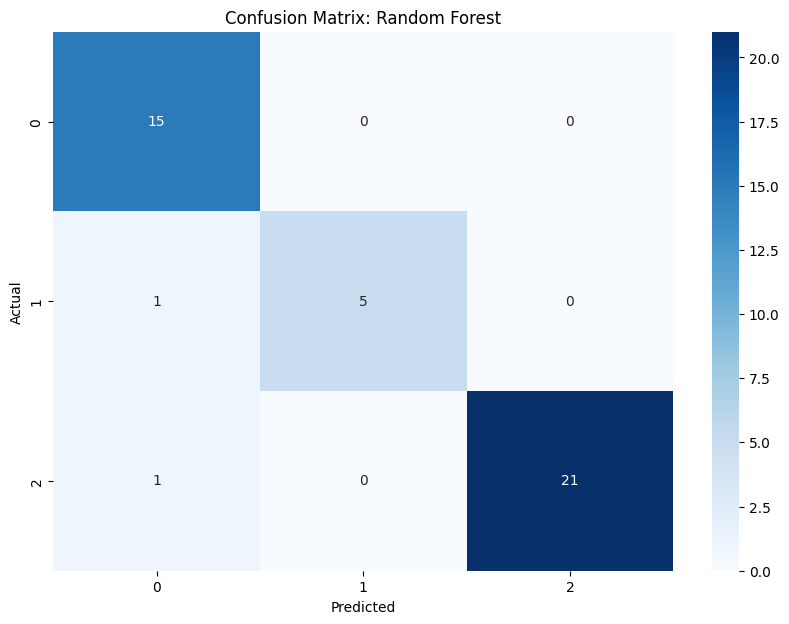

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train Random Forest model
model_rf.fit(X_train, y_train)

# Predictions on training and testing data
y_train_pred = model_rf.predict(X_train)
y_test_pred = model_rf.predict(X_test)

# Compute accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracies
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Classification report for testing data
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix for testing data
cm_rf = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=model_rf.classes_, yticklabels=model_rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Random Forest')
plt.show()

##Perform Cross-Validation for Random Forest

In [ ]:
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(n_estimators=100, random_state=42)

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)

print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())


Cross-Validation Scores: [0.97058824 0.91176471 0.94117647 1.         0.90909091]
Mean Accuracy: 0.946524064171123
Standard Deviation: 0.03486204494760776


##Hyperparameter Tuning for Random Forest using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameters and their values to search
param_grid = {
    'n_estimators': [100, 200, 300, 400],  # Increase the range of values for n_estimators
    'max_depth': [None, 10, 20, 30],  # Fine-tune max_depth with additional values
    'min_samples_split': [2, 5, 10, 20],  # Adjust the range of values for min_samples_split
    'min_samples_leaf': [1, 2, 4, 8]  # Experiment with different values for min_samples_leaf
}

# Create a grid search object
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Perform grid search on your data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.9525846702317292


##Plot Train vs. Test Accuracy for Random Forest

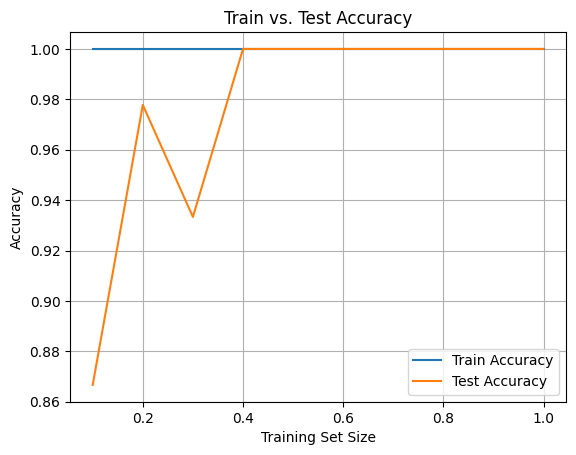

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris  # Example dataset

# Load a dataset (using Iris dataset as an example, replace with your dataset)
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model (Random Forest in this case)
model_rf = RandomForestClassifier()

# Define a range of training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Initialize lists to store train and test accuracies
train_accs = []
test_accs = []

# Iterate over different training set sizes
for train_size in train_sizes:
    # Calculate the number of samples for this training set size
    num_train_samples = int(train_size * len(X_train))

    # Select a subset of the training data
    X_train_subset = X_train[:num_train_samples]
    y_train_subset = y_train[:num_train_samples]

    # Train the model on the subset of training data
    model_rf.fit(X_train_subset, y_train_subset)

    # Predictions on training and testing data
    y_train_pred = model_rf.predict(X_train_subset)
    y_test_pred = model_rf.predict(X_test)

    # Compute accuracy scores
    train_accuracy = accuracy_score(y_train_subset, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append the accuracies to the lists
    train_accs.append(train_accuracy)
    test_accs.append(test_accuracy)

# Plot train vs. test accuracy graph
plt.plot(train_sizes, train_accs, label='Train Accuracy')
plt.plot(train_sizes, test_accs, label='Test Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Train vs. Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()


##Feature Importance Plot for Random Forest

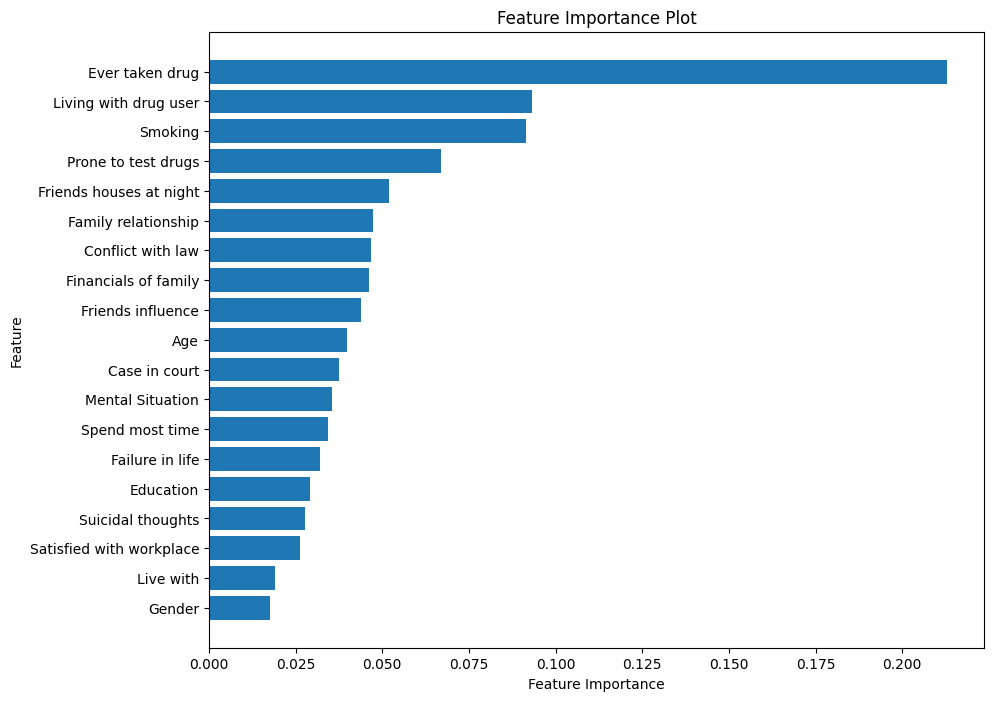

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
feature_importances = model_rf.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Sort the features by their importance
sorted_idx = feature_importances.argsort()

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

##Plot Error Histogram for Random Forest

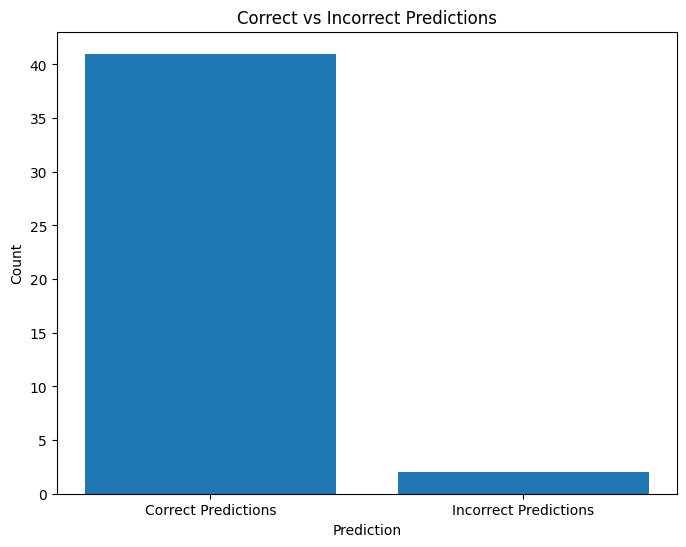

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_error_histogram(model, X, y_true, bins=20):
    """
    Plot histogram of correct and incorrect predictions.

    Parameters:
        model: scikit-learn classifier
            The trained classifier model.
        X: array-like or sparse matrix
            The feature matrix.
        y_true: array-like
            The true target labels.
        bins: int, optional (default: 20)
            Number of bins for the histogram.
    """
    y_pred = model.predict(X)

    correct_predictions = np.sum(y_pred == y_true)
    incorrect_predictions = np.sum(y_pred != y_true)

    # Plot histogram
    plt.figure(figsize=(8, 6))
    plt.bar(['Correct Predictions', 'Incorrect Predictions'], [correct_predictions, incorrect_predictions])
    plt.xlabel('Prediction')
    plt.ylabel('Count')
    plt.title('Correct vs Incorrect Predictions')
    plt.show()


plot_error_histogram(model_rf, X_test, y_test)


##rain and Evaluate Decision Tree Model

In [ ]:
# Initialize the Decision Tree model
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Predict on the testing data
y_pred = dt_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.40      0.67      0.50         6
           2       0.95      0.95      0.95        22

    accuracy                           0.79        43
   macro avg       0.72      0.74      0.72        43
weighted avg       0.83      0.79      0.80        43



##Train and Evaluate XGBoost Model

In [ ]:
# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_pred))

XGBoost Accuracy: 0.79
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.53      0.64        15
           1       0.44      0.67      0.53         6
           2       0.92      1.00      0.96        22

    accuracy                           0.79        43
   macro avg       0.72      0.73      0.71        43
weighted avg       0.81      0.79      0.79        43



##Hyperparameter Tuning for XGBoost using RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(50, 300, 50),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'max_depth': np.arange(3, 10),
    'subsample': np.linspace(0.6, 1.0, 5),
    'colsample_bytree': np.linspace(0.6, 1.0, 5),
    'gamma': np.linspace(0, 0.5, 5)
}

# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist,
                                   n_iter=100, scoring='accuracy', cv=3, verbose=1, n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters from RandomizedSearchCV
best_params = random_search.best_params_
print("Best parameters found: ", best_params)

# Train the XGBoost model with the best parameters
best_xgb_model = random_search.best_estimator_
best_xgb_model.fit(X_train, y_train)

# Predict on the test data
xgb_pred = best_xgb_model.predict(X_test)

# Calculate accuracy
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")

# Generate the classification report
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_pred))


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'subsample': 0.7, 'n_estimators': 50, 'max_depth': 6, 'learning_rate': 0.2677777777777778, 'gamma': 0.25, 'colsample_bytree': 1.0}
XGBoost Accuracy: 0.79
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.57      0.64        14
           1       0.50      0.57      0.53         7
           2       0.92      1.00      0.96        22

    accuracy                           0.79        43
   macro avg       0.71      0.71      0.71        43
weighted avg       0.79      0.79      0.78        43



##Train and Evaluate Gradient Boosting Model

In [ ]:
# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_pred))

Gradient Boosting Accuracy: 0.81
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.44      0.67      0.53         6
           2       0.96      1.00      0.98        22

    accuracy                           0.81        43
   macro avg       0.74      0.76      0.73        43
weighted avg       0.84      0.81      0.82        43



##Hyperparameter Tuning for Gradient Boosting using RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(50, 300, 50),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'max_depth': np.arange(3, 10),
    'subsample': np.linspace(0.6, 1.0, 5),
    'min_samples_split': np.arange(2, 10),
    'min_samples_leaf': np.arange(1, 10)
}

# Initialize the GradientBoostingClassifier model
gb_model = GradientBoostingClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_dist,
                                   n_iter=100, scoring='accuracy', cv=3, verbose=1, n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters from RandomizedSearchCV
best_params = random_search.best_params_
print("Best parameters found: ", best_params)

# Train the GradientBoostingClassifier with the best parameters
best_gb_model = random_search.best_estimator_
best_gb_model.fit(X_train, y_train)

# Predict on the test data
gb_pred = best_gb_model.predict(X_test)

# Calculate accuracy
gb_accuracy = accuracy_score(y_test, gb_pred)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")

# Generate the classification report
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_pred))


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'subsample': 0.9, 'n_estimators': 100, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_depth': 9, 'learning_rate': 0.3}
Gradient Boosting Accuracy: 0.81
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.57      0.67        14
           1       0.56      0.71      0.63         7
           2       0.92      1.00      0.96        22

    accuracy                           0.81        43
   macro avg       0.76      0.76      0.75        43
weighted avg       0.82      0.81      0.81        43



##Train and Evaluate KNN Model

In [ ]:

# Initialize KNN

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


# Generate the classification report
class_report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.80      0.67      0.73         6
           2       0.81      0.95      0.88        22

    accuracy                           0.81        43
   macro avg       0.81      0.76      0.78        43
weighted avg       0.82      0.81      0.81        43



##Hyperparameter Tuning for SVC using RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}

# Create an SVC instance
svc = SVC(random_state=42)

# Create a RandomizedSearchCV object
random_search_svc = RandomizedSearchCV(estimator=svc, param_distributions=param_grid, n_iter=50,
                                       scoring='accuracy', cv=5, random_state=22)

# Perform the random search on your data
random_search_svc.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_svc = random_search_svc.best_params_
best_score_svc = random_search_svc.best_score_

print("Best Parameters for SVC:", best_params_svc)
print("Best Score for SVC:", best_score_svc)
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred))


C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 32 is smaller than n_iter=50. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters for SVC: {'kernel': 'linear', 'gamma': 'scale', 'C': 0.1}
Best Score for SVC: 0.7980392156862746
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.80      0.67      0.73         6
           2       0.81      0.95      0.88        22

    accuracy                           0.81        43
   macro avg       0.81      0.76      0.78        43
weighted avg       0.82      0.81      0.81        43



##Hyperparameter Tuning for Naive Bayes using RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB

# Define the hyperparameter grid (Naive Bayes doesn't have many hyperparameters to tune)
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Variance smoothing parameter
}

# Create a Gaussian Naive Bayes instance
nb = GaussianNB()

# Create a RandomizedSearchCV object
random_search_nb = RandomizedSearchCV(estimator=nb, param_distributions=param_grid, n_iter=5,
                                      scoring='accuracy', cv=5, random_state=41)

# Perform the random search on your data
random_search_nb.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_nb = random_search_nb.best_params_
best_score_nb = random_search_nb.best_score_

print("Best Parameters for Naive Bayes:", best_params_nb)
print("Best Score for Naive Bayes:", best_score_nb)
print("Classification Report for Naive Bayes:")
print(classification_report(y_test, y_pred))

Best Parameters for Naive Bayes: {'var_smoothing': 1e-09}
Best Score for Naive Bayes: 0.8037433155080214
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.80      0.67      0.73         6
           2       0.81      0.95      0.88        22

    accuracy                           0.81        43
   macro avg       0.81      0.76      0.78        43
weighted avg       0.82      0.81      0.81        43



##Train and Evaluate Ensemble Model (VotingClassifier)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Initialize individual classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
gb_classifier = GradientBoostingClassifier(random_state=42)
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
knn_classifier = KNeighborsClassifier()
svc_classifier = SVC(kernel='rbf', probability=True)
nb_classifier = GaussianNB()
dt_classifier = DecisionTreeClassifier()

# Create the ensemble model
ensemble = VotingClassifier(estimators=[
    ('rf', rf_classifier),
    ('gb', gb_classifier),
    ('xgb', xgb_classifier),
    ('knn', knn_classifier),
    ('svc', svc_classifier),
    ('nb', nb_classifier),
    ('dt', dt_classifier)
], voting='soft')

# Train the ensemble model
ensemble.fit(X_train, y_train)

# Evaluate the ensemble model
ensemble_accuracy = ensemble.score(X_test, y_test)
print("Ensemble Accuracy:", ensemble_accuracy)


Ensemble Accuracy: 0.8604651162790697
